In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder ,OrdinalEncoder,LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('patient_dataset_100k_clean.csv')
df = df.drop(columns=['ID_Patient'])

In [3]:
df.head()

,Sexe,Age,Tabac,Sport,Alimentation,Etat_habitude,Categorie_antecedent,Type_antecedent,Motif_hosp,EtatDeSanteGeneral,ID_Vaccin,Diabete,Hypertension,Cancer_sein,Asthme
0,H,2,0,0,1,Mauvaise,Personnel,Psychiatrique,Traitement,Stable,3,1,0,0,0
1,H,14,1,1,0,Moyenne,Personnel,Medical,Urgence,Stable,1,0,0,0,1
2,F,57,0,0,0,Mauvaise,Personnel,Chirurgical,Traitement,Critique,3,0,1,0,0
3,F,34,1,0,1,Bonne,Familial,Medical,Suivi,Ameliore,5,0,0,1,0
4,H,49,1,1,0,Mauvaise,Personnel,Psychiatrique,Suivi,Critique,1,0,0,1,0


In [4]:
df.tail()

,Sexe,Age,Tabac,Sport,Alimentation,Etat_habitude,Categorie_antecedent,Type_antecedent,Motif_hosp,EtatDeSanteGeneral,ID_Vaccin,Diabete,Hypertension,Cancer_sein,Asthme
99995,F,26,0,1,1,Moyenne,Familial,Psychiatrique,Suivi,Stable,4,1,0,0,1
99996,F,81,1,0,0,Moyenne,Familial,Medical,Urgence,Ameliore,2,0,0,0,1
99997,H,25,0,0,0,Bonne,Personnel,Psychiatrique,Suivi,Ameliore,4,1,0,1,0
99998,H,42,0,1,0,Mauvaise,Personnel,Medical,Consultation,Ameliore,3,0,1,1,0
99999,F,52,1,0,0,Moyenne,Familial,Psychiatrique,Consultation,Ameliore,3,0,1,0,0


In [5]:
X = df[['Sexe', 'Age', 'Tabac', 'Sport', 'Alimentation',
        'Etat_habitude', 'Categorie_antecedent', 'Type_antecedent', 
        'Motif_hosp', 'EtatDeSanteGeneral', 'ID_Vaccin']]

In [6]:
X

,Sexe,Age,Tabac,Sport,Alimentation,Etat_habitude,Categorie_antecedent,Type_antecedent,Motif_hosp,EtatDeSanteGeneral,ID_Vaccin
0,H,2,0,0,1,Mauvaise,Personnel,Psychiatrique,Traitement,Stable,3
1,H,14,1,1,0,Moyenne,Personnel,Medical,Urgence,Stable,1
2,F,57,0,0,0,Mauvaise,Personnel,Chirurgical,Traitement,Critique,3
3,F,34,1,0,1,Bonne,Familial,Medical,Suivi,Ameliore,5
4,H,49,1,1,0,Mauvaise,Personnel,Psychiatrique,Suivi,Critique,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,F,26,0,1,1,Moyenne,Familial,Psychiatrique,Suivi,Stable,4
99996,F,81,1,0,0,Moyenne,Familial,Medical,Urgence,Ameliore,2
99997,H,25,0,0,0,Bonne,Personnel,Psychiatrique,Suivi,Ameliore,4
99998,H,42,0,1,0,Mauvaise,Personnel,Medical,Consultation,Ameliore,3


In [7]:
def Encoding(X):
    X_Encoding = X.copy()
    #Encoding sexe column  0 for H and 1 for F using  one-hot methode 
    encoder = OneHotEncoder(sparse_output=False)
    X_Encoding ['Sexe'] = encoder.fit_transform(X_Encoding[['Sexe']])
    
    """
     Encoding Etat_habitude : it has a natural order: Bonne > Moyenne > Mauvaise 
     Ordinal Encoding is the best encoding for this column
    """
    ordinal_encoder = OrdinalEncoder(categories=[['Mauvaise', 'Moyenne', 'Bonne']])
    X_Encoding['Etat_habitude'] = ordinal_encoder.fit_transform(X_Encoding[['Etat_habitude']])
    #Encoding Categorie_antecedent column  0 for Familial and 1 for Personnel using  one-hot methode 
    X_Encoding['Categorie_antecedent'] = encoder.fit_transform(X_Encoding[['Categorie_antecedent']])
    # order not metter
    label_encoder = LabelEncoder()
    X_Encoding['Type_antecedent'] = label_encoder.fit_transform(X_Encoding['Type_antecedent'])
    X_Encoding['Motif_hosp'] = label_encoder.fit_transform(X_Encoding['Motif_hosp'])
    """
     EtatDeSanteGeneral has a natural order:
     Critique < Stable < Ameliore
    """
    ordinal_encoder_EtatDeSanteGeneral = OrdinalEncoder(categories=[['Critique', 'Stable', 'Ameliore']])
    X_Encoding['EtatDeSanteGeneral'] = ordinal_encoder_EtatDeSanteGeneral.fit_transform(X_Encoding[['EtatDeSanteGeneral']])
    return X_Encoding

In [8]:
X_Encoding = Encoding(X)

In [9]:
X_Encoding

,Sexe,Age,Tabac,Sport,Alimentation,Etat_habitude,Categorie_antecedent,Type_antecedent,Motif_hosp,EtatDeSanteGeneral,ID_Vaccin
0,0.0,2,0,0,1,0.0,0.0,2,2,1.0,3
1,0.0,14,1,1,0,1.0,0.0,1,3,1.0,1
2,1.0,57,0,0,0,0.0,0.0,0,2,0.0,3
3,1.0,34,1,0,1,2.0,1.0,1,1,2.0,5
4,0.0,49,1,1,0,0.0,0.0,2,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,26,0,1,1,1.0,1.0,2,1,1.0,4
99996,1.0,81,1,0,0,1.0,1.0,1,3,2.0,2
99997,0.0,25,0,0,0,2.0,0.0,2,1,2.0,4
99998,0.0,42,0,1,0,0.0,0.0,1,0,2.0,3


In [10]:
X_Encoding.to_csv("preprocessed_data.csv", index=False) 

In [11]:
y = df[['Diabete', 'Hypertension', 'Cancer_sein', 'Asthme']]

In [12]:
y

,Diabete,Hypertension,Cancer_sein,Asthme
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
99995,1,0,0,1
99996,0,0,0,1
99997,1,0,1,0
99998,0,1,1,0


In [13]:
y.to_csv("data_target.csv", index=False) 

In [14]:
X_train ,X_test,y_train,y_test = train_test_split(X_Encoding,y, test_size=0.25,stratify=y)
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', OneVsRestClassifier(SVC( #OneVsRestClassifier() Converts binary SVM into a multi-label classifier by training one SVM per label.
            kernel='linear',  # Radial Basis Function kernel
            probability=True,  # Enable probability estimates
            random_state=42
        )))
    ])


In [15]:
X_train_small = X_train[:1000] 
y_train_small = y_train[:1000]
pipeline.fit(X_train_small,y_train_small)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 OneVsRestClassifier(estimator=SVC(kernel='linear',
                                                   probability=True,
                                                   random_state=42)))])

In [16]:
X_test_small = X_test[:1000]
y_pred = pipeline.predict(X_test_small)

In [17]:
y_pred

array([[0, 1, 0, 0],
       [0, 1, 1, 0],
       [1, 1, 0, 1],
       ...,
       [1, 0, 0, 1],
       [0, 0, 0, 0],
       [1, 0, 0, 1]])

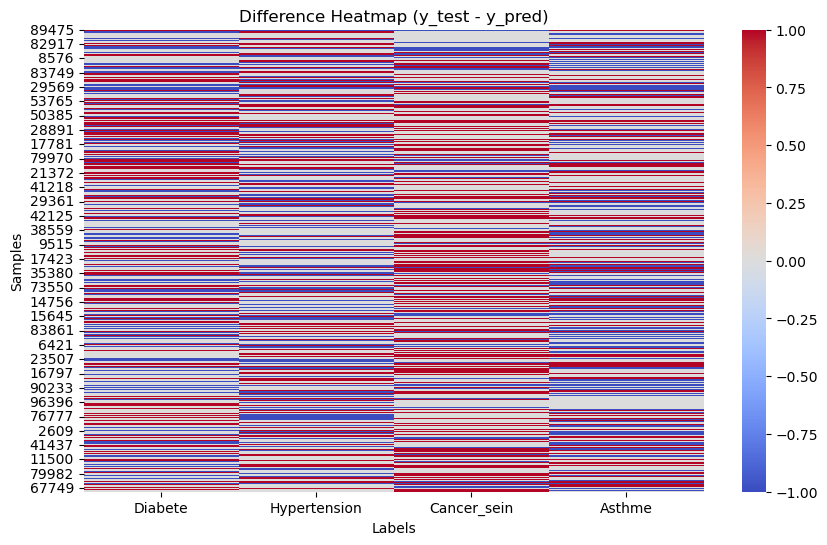

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

y_test_small = y_test[:1000]
# Calculate the difference matrix
diff = y_test_small - y_pred

plt.figure(figsize=(10,6))
sns.heatmap(diff, cmap='coolwarm', cbar=True)
plt.title('Difference Heatmap (y_test - y_pred)')
plt.xlabel('Labels')
plt.ylabel('Samples')
plt.show()


In [20]:
col_idx = list(y_test_small.columns).index('Cancer_sein')
accuracy = accuracy_score(y_test_small['Cancer_sein'], y_pred[:, col_idx])
print("Accuracy Score:", accuracy)

Accuracy Score: 0.524
